<a href="https://www.kaggle.com/code/dheerajanumula/eda-project-4-university-rankings?scriptVersionId=255382420" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Global University Rankings Analysis

-> To begin the analysis, we import the essential Python libraries:

**Pandas** for data manipulation and analysis.

**Numpy** for numerical operations.

**matplotlib.pyplot** for visualizing the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We begin by importing the dataset using pandas. The dataset contains information about Universities around the world 

In [2]:
df=pd.read_csv("/kaggle/input/world-university-rankings/cwurData.csv")
df=pd.DataFrame(df)

In [3]:
df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


This dataset contains information on **2,200 universities** with the following key details:

- **Total Records**: 2,200
- **Number of Columns**: 14

- Most columns are numeric (either `int64` or `float64`), with `institution` and `country` being string types.
- `broad_impact` has **200 missing values**, which may need to be handled during analysis.

# Data Cleaning

In [4]:
df.isnull().sum() 

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

Filling Broad Impact values with 0 

In [5]:
df['broad_impact'] = df['broad_impact'].fillna(0)

In [6]:
df.isnull().sum() 

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

**DAta is clean and ready for analysis**

## EDA

**Descriptive Statistics**

In [7]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,451.545000,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,308.600387,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,175.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,447.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,716.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


The national rank ranges from 1 to 229, with a mean of 40.

Quality of education, alumni employment, and quality of faculty have average scores around 275–357 
The publications, influence, and citations metrics show similar mean values around 400–460, indicating balanced academic output.

The broad impact column (after filling missing values) has a mean of approximately 497, with values ranging from 1 to 1000.

Patents vary widely, with an average of 433.

The score column, likely a normalized metric, has a narrow range (43.36 to 47.8), with a small standard deviation (7.76).

The data spans from 2012 to 2015, with the average year being around 2014.

In [8]:
df['year'].sort_values(ascending=False).head(1,)

2199    2015
Name: year, dtype: int64

This indicates that the dataset includes university rankings up to the year 2015.

**What are the top 20 Universities based on quality of Education**

In [9]:
sorted_df = df.sort_values(by='quality_of_education', ascending=True)

sorted_df.head(20)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
20,21,Rockefeller University,USA,15,1,101,16,101,28,96,0.0,101,61.74,2012
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
100,1,Harvard University,USA,1,1,1,1,1,1,1,0.0,7,100.00,2013
103,4,Massachusetts Institute of Technology,USA,3,2,16,2,16,3,3,0.0,1,91.45,2013
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,0.0,18,85.21,2012
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
53,54,École normale supérieure - Paris,France,2,3,61,77,101,101,101,0.0,101,49.10,2012
104,5,University of Cambridge,United Kingdom,2,3,15,5,9,11,10,0.0,39,90.24,2013


**What are the top 10 Univeristies based on World_rank**

In [10]:
top10 = df[df['year'] == 2015].sort_values('world_rank').head(10)
top10[['world_rank', 'institution', 'country', 'score']]


,world_rank,institution,country,score
1200,1,Harvard University,USA,100.00
1201,2,Stanford University,USA,98.66
1202,3,Massachusetts Institute of Technology,USA,97.54
1203,4,University of Cambridge,United Kingdom,96.81
1204,5,University of Oxford,United Kingdom,96.46
1205,6,Columbia University,USA,96.14
1206,7,"University of California, Berkeley",USA,92.25
1207,8,University of Chicago,USA,90.70
1208,9,Princeton University,USA,89.42
1209,10,Cornell University,USA,86.79


**What are the countries with most univeristies in Top 100**

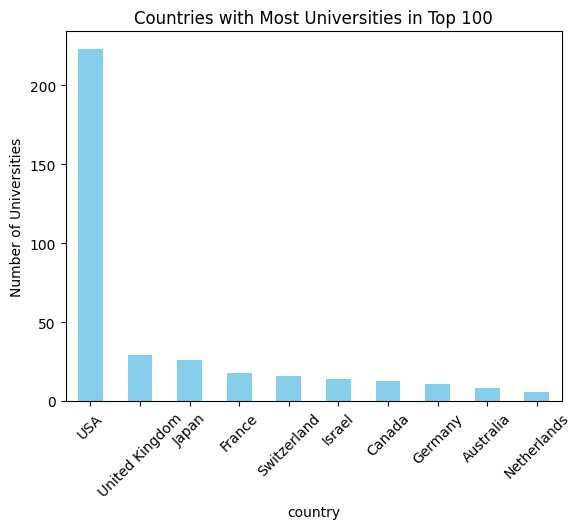

In [11]:
top100 = df[df['world_rank'] <= 100]
top100['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Countries with Most Universities in Top 100")
plt.ylabel("Number of Universities")
plt.xticks(rotation=45)
plt.show()

This bar chart shows the number of universities each country has in the top 100 rankings:

USA dominates with over 200 universities, far more than any other country.

United Kingdom, Japan, and France follow with significantly fewer universities.

**What are the top 10 uniersities with most publications**

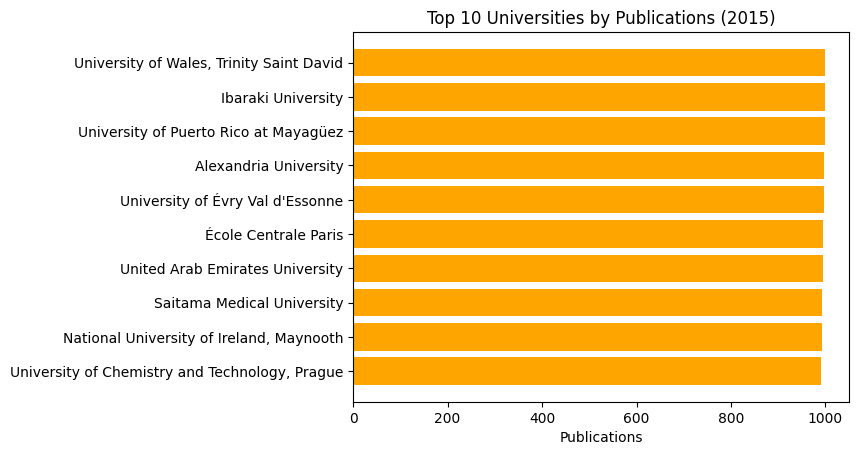

In [12]:
top_pub = df[df['year'] == 2015].sort_values('publications', ascending=False).head(10)
plt.barh(top_pub['institution'], top_pub['publications'], color='orange')
plt.xlabel("Publications")
plt.title("Top 10 Universities by Publications (2015)")
plt.gca().invert_yaxis()
plt.show()

This bar chart shows the top 10 universities based on the number of publications in the year 2015.

All listed universities have similar publication counts, close to 1000.

Some of the top contributors include:

University of Wales, Trinity Saint David

Ibaraki University

University of Puerto Rico at Mayagüez

Alexandria University

École Centrale Paris

**What is the world_rank trend of harvard**

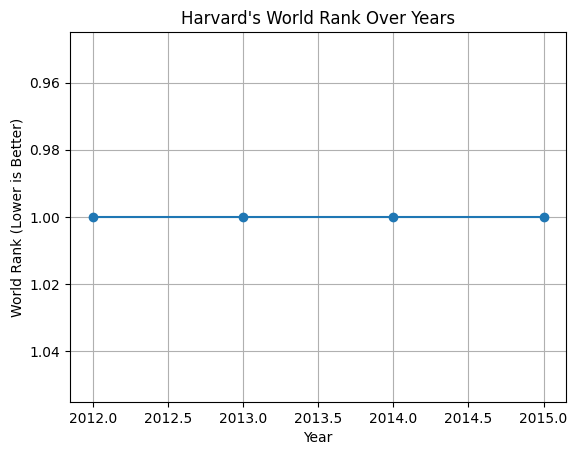

In [13]:
harvard = df[df['institution'] == 'Harvard University']
plt.plot(harvard['year'], harvard['world_rank'], marker='o')
plt.title("Harvard's World Rank Over Years")
plt.xlabel("Year")
plt.ylabel("World Rank (Lower is Better)")
plt.gca().invert_yaxis()
plt.grid()
plt.show()

This line chart shows Harvard University's world rank from 2012 to 2015.

Harvard consistently held the #1 position for four consecutive years.

This highlights Harvard’s academic excellence and global dominance in higher education during this period.

**What are the top 5 countries with avg university score**

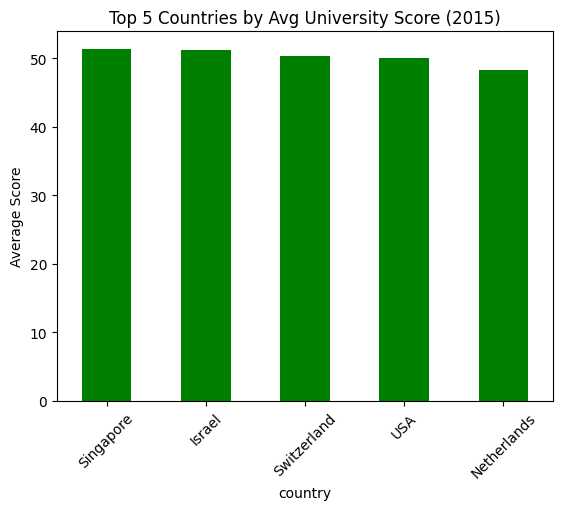

In [14]:
avg_score = df[df['year'] == 2015].groupby('country')['score'].mean().sort_values(ascending=False).head(5)
avg_score.plot(kind='bar', color='green')
plt.ylabel("Average Score")
plt.title("Top 5 Countries by Avg University Score (2015)")
plt.xticks(rotation=45)
plt.show()

This bar chart highlights the top 5 countries in terms of average university score for the year 2015:

Singapore and Israel lead with the highest average scores, just above 51.

Switzerland and the USA follow closely.

Netherlands ranks 5th, with an average score slightly below 50.

**Which univeristies have TOP ALUMNI EMPLOYMENT**

In [15]:
top_alumni = df[df['alumni_employment'] > 0].sort_values('alumni_employment').head(5)
top_alumni[['institution', 'country', 'alumni_employment']]


,institution,country,alumni_employment
1200,Harvard University,USA,1
200,Harvard University,USA,1
100,Harvard University,USA,1
1201,Stanford University,USA,2
201,Stanford University,USA,2


Harvard University consistently holds the top position (1) for alumni employment across all its entries.

Stanford University is ranked 2nd, indicating strong but slightly lower alumni employment outcomes compared to Harvard.

**UNIVERSITIES WITH MOST PUBLICATIONS**

In [16]:
top_publications = df.sort_values('publications', ascending=False).head(5)
top_publications[['institution', 'country', 'publications']]


,institution,country,publications
1019,"National University of Ireland, Maynooth",Ireland,1000
2029,"University of Wales, Trinity Saint David",United Kingdom,1000
1176,University of Puerto Rico at Mayagüez,Puerto Rico,999
2169,Ibaraki University,Japan,999
938,University of Évry Val d'Essonne,France,998


All listed universities have very high publication counts, with the top two reaching 1000 publications.

This indicates a strong emphasis on research output at these institutions.

**WHAT IS THE AVERAGE SCORE OF USA UNIVERSITIES**

In [17]:
usa_avg_score = df[df['country'] == 'USA']['score'].mean()
print("Average score for USA universities:", round(usa_avg_score, 2))


Average score for USA universities: 51.84


**Number of Universities by Country**

In [18]:
top_countries = df['country'].value_counts().head(5)
print(top_countries)

country
USA               573
China             167
Japan             159
United Kingdom    144
Germany           115
Name: count, dtype: int64


**Top 5 Universities by Score**

In [19]:
top_2015 = df[df['year'] == 2015].sort_values('world_rank').head(5)
top_2015[['world_rank', 'institution', 'country', 'score']]

,world_rank,institution,country,score
1200,1,Harvard University,USA,100.00
1201,2,Stanford University,USA,98.66
1202,3,Massachusetts Institute of Technology,USA,97.54
1203,4,University of Cambridge,United Kingdom,96.81
1204,5,University of Oxford,United Kingdom,96.46


In [20]:
correlation = df['publications'].corr(df['citations'])
print("Correlation between publications and citations:", round(correlation, 2))

Correlation between publications and citations: 0.83


This indicates a strong positive correlation — as the number of publications increases, the number of citations tends to increase as well.



**Top 10 Univeristies with most patents**

In [21]:
top_patents = df[['institution', 'patents']].sort_values(by='patents', ascending=False).head(10)
print("Top 10 universities by number of patents:\n", top_patents)


Top 10 universities by number of patents:
                                          institution  patents
1478                      London School of Economics      871
2046  King Fahd University of Petroleum and Minerals      871
2068                             Makerere University      871
2066            University of the Republic (Uruguay)      871
2064                 National Chung Cheng University      871
1781                          University of Ioannina      871
2053           Tehran University of Medical Sciences      871
2051                                 Gazi University      871
1792                             Carleton University      871
2044                                Sofia University      871


**Top 10 universities by Broad_impact**

In [22]:
top_impact = df[['institution', 'broad_impact']].sort_values(by='broad_impact', ascending=False).head(10)
print("Top 10 universities by broad impact:\n", top_impact)


Top 10 universities by broad impact:
                                      institution  broad_impact
1449  Moscow Institute of Physics and Technology        1000.0
1199                          Yanbian University        1000.0
2174                         Shenzhen University         999.0
1198   National University of Defense Technology         999.0
2192               Southwest Jiaotong University         998.0
1191                   King Abdulaziz University         998.0
1759                          Dongguk University         997.0
1159                 Beijing Jiaotong University         997.0
1196    National Taipei University of Technology         994.0
2194                   King Abdulaziz University         994.0


**Top 10 Countries by Number of Ranked Universities**

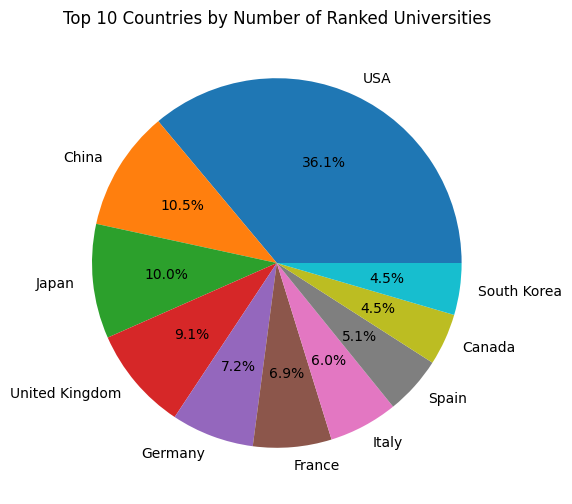

In [23]:
country_counts = df['country'].value_counts().head(10)
country_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Top 10 Countries by Number of Ranked Universities')
plt.ylabel('')
plt.show()

The chart shows that the USA dominates with the highest proportion of ranked universities, making up over one-third of the total. China and Japan follow with around 10% each.

# Summary 
The USA has the highest number of ranked universities, followed by China, Japan, and the UK.

Harvard University consistently held the #1 world rank from 2012 to 2015.

The top 5 countries by average university score in 2015 include Singapore, Israel, Switzerland, the USA, and the Netherlands.

Institutions like Harvard and Stanford rank high in alumni employment and overall score.

Publications and citations are strongly correlated, with a correlation value of 0.83.

The top universities by broad impact are mostly from China and other Asian countries.

Average score for USA universities: 51.84 which shows Quality of Education is USA

**The data shows that the USA dominates global university rankings both in terms of quantity and quality. Harvard consistently holds the top position, and American universities perform exceptionally well in alumni employment and research output. Countries like Singapore, Israel, and Switzerland show strong average scores, indicating that even with fewer institutions, the quality remains high.**